# AIM : Perform ensemble learning boosting method.

In [1]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


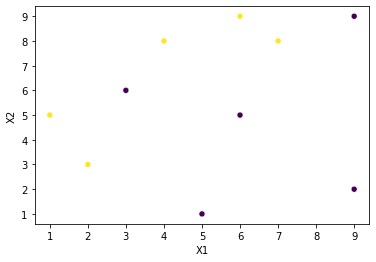

In [5]:
import seaborn as sns
sns.scatterplot(df['X1'],df['X2'],c = df['label'])

In [6]:
# STUMP
from sklearn.tree import DecisionTreeClassifier

In [7]:
df1 = DecisionTreeClassifier(max_depth = 1)

In [8]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [9]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [10]:
df1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

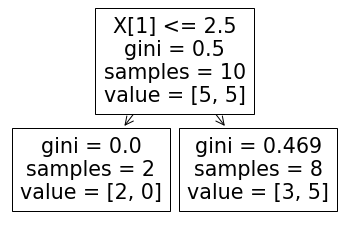

In [11]:
from sklearn.tree import plot_tree
plot_tree(df1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


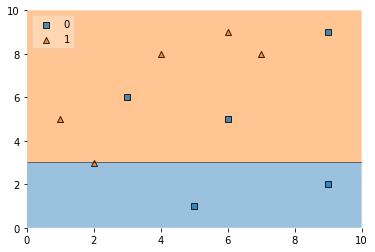

In [12]:
plot_decision_regions(x,y,clf = df1,legend = 2)

In [13]:
df['y_pred'] = df1.predict(x)
df

,X1,X2,label,y_pred
0,1,5,1,1
1,2,3,1,1
2,3,6,0,1
3,4,8,1,1
4,5,1,0,0
5,6,9,1,1
6,6,5,0,1
7,7,8,1,1
8,9,9,0,1
9,9,2,0,0


In [14]:
df['weights'] = 1/df.shape[0]

In [15]:
df

,X1,X2,label,y_pred,weights
0,1,5,1,1,0.1
1,2,3,1,1,0.1
2,3,6,0,1,0.1
3,4,8,1,1,0.1
4,5,1,0,0,0.1
5,6,9,1,1,0.1
6,6,5,0,1,0.1
7,7,8,1,1,0.1
8,9,9,0,1,0.1
9,9,2,0,0,0.1


In [16]:
def calculate_weights_error(error):
    return 0.5 * np.log((1-error)/error)

In [17]:
calculate_weights_error(0.3)

0.42364893019360184

In [18]:
def update_weight(row,error = 0.423):
    if row['label'] == row['y_pred']:
      return row['weights']*np.exp(-error)
    else:
      return row['weights']*np.exp(error)

In [19]:
df['updated_weights'] = df.apply(update_weight,axis = 1)

In [20]:
df

,X1,X2,label,y_pred,weights,updated_weights
0,1,5,1,1,0.1,0.065508
1,2,3,1,1,0.1,0.065508
2,3,6,0,1,0.1,0.152653
3,4,8,1,1,0.1,0.065508
4,5,1,0,0,0.1,0.065508
5,6,9,1,1,0.1,0.065508
6,6,5,0,1,0.1,0.152653
7,7,8,1,1,0.1,0.065508
8,9,9,0,1,0.1,0.152653
9,9,2,0,0,0.1,0.065508


In [21]:
df['updated_weights'].sum()

0.9165153319682015

In [22]:
df['normalized_weight'] = df['updated_weights']/df['updated_weights'].sum()

In [23]:
df

,X1,X2,label,y_pred,weights,updated_weights,normalized_weight
0,1,5,1,1,0.1,0.065508,0.071475
1,2,3,1,1,0.1,0.065508,0.071475
2,3,6,0,1,0.1,0.152653,0.166559
3,4,8,1,1,0.1,0.065508,0.071475
4,5,1,0,0,0.1,0.065508,0.071475
5,6,9,1,1,0.1,0.065508,0.071475
6,6,5,0,1,0.1,0.152653,0.166559
7,7,8,1,1,0.1,0.065508,0.071475
8,9,9,0,1,0.1,0.152653,0.166559
9,9,2,0,0,0.1,0.065508,0.071475


In [24]:
df['normalized_weight'].sum()

1.0

In [25]:
df['cumsum_upper'] = np.cumsum(df['normalized_weight'])

In [26]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weight']

In [27]:
df

,X1,X2,label,y_pred,weights,updated_weights,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,1,0.1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,1,0.1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,1,0.1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,1,0.1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0,0.1,0.065508,0.071475,0.452458,0.380983
5,6,9,1,1,0.1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,1,0.1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,1,0.1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,1,0.1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0,0.1,0.065508,0.071475,1.000000,0.928525


In [28]:
def fetch_index(df):
  indices = []
  for i in range(df.shape[0]):
    a = np.random.random()
    for index, row in df.iterrows():
      if row['cumsum_upper']>a and a>row['cumsum_lower']:
        indices.append(index)
  return indices

In [29]:
index_values = fetch_index(df)
index_values

[1, 6, 7, 2, 8, 8, 0, 9, 6, 1]

In [30]:
df

,X1,X2,label,y_pred,weights,updated_weights,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,1,0.1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,1,0.1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,1,0.1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,1,0.1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0,0.1,0.065508,0.071475,0.452458,0.380983
5,6,9,1,1,0.1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,1,0.1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,1,0.1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,1,0.1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0,0.1,0.065508,0.071475,1.000000,0.928525


In [31]:
df2 = df.iloc[index_values,[0,1,2,3]]

In [32]:
df2

,X1,X2,label,y_pred
1,2,3,1,1
6,6,5,0,1
7,7,8,1,1
2,3,6,0,1
8,9,9,0,1
8,9,9,0,1
0,1,5,1,1
9,9,2,0,0
6,6,5,0,1
1,2,3,1,1


In [33]:
dt2 = DecisionTreeClassifier(max_depth = 1)

In [34]:
x = df2.iloc[:,0:2].values
y = df2.iloc[:,2].values

In [35]:
y

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [36]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]')]

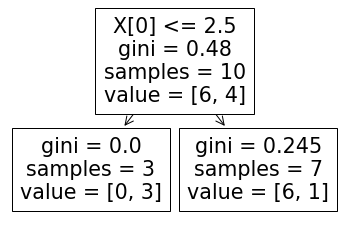

In [37]:
plot_tree(dt2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


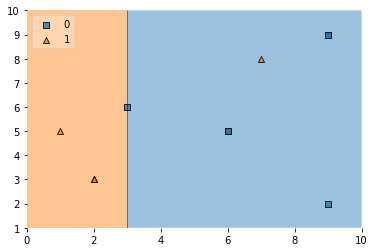

In [38]:
plot_decision_regions(x,y,clf = dt2,legend = 2)

In [39]:
df2['y_pred'] = dt2.predict(x)

In [40]:
df2

,X1,X2,label,y_pred
1,2,3,1,1
6,6,5,0,0
7,7,8,1,0
2,3,6,0,0
8,9,9,0,0
8,9,9,0,0
0,1,5,1,1
9,9,2,0,0
6,6,5,0,0
1,2,3,1,1


In [41]:
calculate_weights_error(0.1)

1.0986122886681098

In [42]:
inp = np.array([6,9]).reshape(1,2)

In [43]:
df1.predict(inp)

array([1])

In [44]:
dt2.predict(inp)

array([0])